## Plot the B3LYP/G4MP2 results

In [1]:
import numpy as np
from copy import deepcopy


import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'



# G4MP2 
one_fi = np.array([[7.402581, 8.048289, 7.102788, 9.823986, 7.725435, 7.84074 ],
       [3.389967, 4.450773, 3.574455, 4.312407, 3.666699, 3.68976 ],
       [1.222233, 1.337538, 1.38366 , 1.245294, 1.545087, 1.568148],
       [0.853257, 0.784074, 0.737952, 0.968562, 0.761013, 0.784074]])

# B3LYP/G4MP2
two_fi = np.array([[1.199172, 1.268355, 1.014684, 1.15305 , 1.199172, 1.429782],
       [0.599586, 0.761013, 0.599586, 0.599586, 0.599586, 0.599586],
       [0.484281, 0.484281, 0.438159, 0.46122 , 0.46122 , 0.507342],
       [0.345915, 0.415098, 0.392037, 0.392037, 0.484281, 0.415098]])


# high-fi size
n = np.array([ 200, 1000, 3000, 5485])

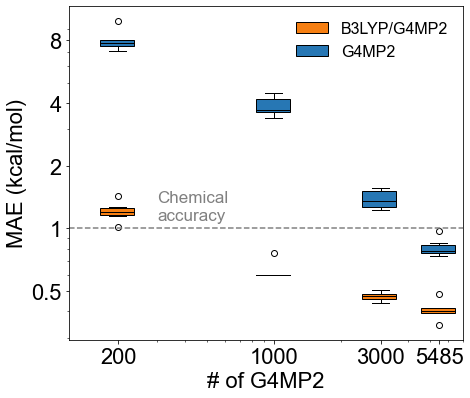

In [2]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
w = 0.15
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)

box1=plt.boxplot(np.array(two_fi).T, positions=n, widths=width(n, w), patch_artist=True, 
            boxprops=dict(facecolor="#F67F12", color='k'))
for i in box1['medians']:
    plt.setp(i, color='k')
    
box2 = plt.boxplot(np.array(one_fi).T, positions=n, widths=width(n, w), patch_artist=True, 
           boxprops=dict(facecolor="#2777B4", color='k')
           )
for i in box2['medians']:
    plt.setp(i, color='k')
plt.yscale('log')
plt.xscale("log")

xlims = plt.gca().get_xlim()
plt.plot([120, 7000], [1, 1], '--', color='grey')
plt.xlim(120, 7000)


plt.xticks([200, 1000, 3000, 5485], [200, 1000, 3000, 5485])
plt.yticks([0.5, 1, 2, 4, 8], [0.5, 1, 2, 4, 8])
#plt.yticks([0.01, 0.05, 0.1, 0.2, 0.4], [0.01, 0.05, 0.1, 0.2, 0.4])
plt.text(300, 1.1, "Chemical\naccuracy", color='grey', size=17)
plt.xlabel('# of G4MP2')
plt.ylabel("MAE (kcal/mol)")
plt.legend([ box1['boxes'][1], box2['boxes'][1]], ['B3LYP/G4MP2', 'G4MP2'], fontsize=16, frameon=False)
#plt.legend(fontsize=16, frameon=False)
plt.tight_layout()

## Plot the QM7b results

In [3]:
data = {'HF-CCSD(T)': {'1': {'2': [16.983, 15.572, 15.56, 16.743, 16.368, 16.82],
   '4': [15.871, 15.121, 14.951, 15.815, 16.008, 17.848],
   '8': [15.931, 15.438, 15.898, 16.116, 13.357, 16.153],
   '16': [15.734, 14.148, 16.2, 15.863, 15.865, 14.818],
   '32': [14.844, 13.811, 15.167, 14.154, 13.665, 15.995],
   '64': [10.446, 6.577, 10.09, 11.656, 12.738, 13.528],
   '128': [10.419, 5.967, 6.732, 7.578, 5.45, 14.125],
   '256': [5.244, 2.715, 3.618, 3.72, 3.23, 3.794],
   '512': [1.588, 1.812, 2.002, 2.192, 2.048, 1.852],
   '1024': [1.017, 0.988, 0.937, 1.095, 1.061, 1.088],
   '2048': [],
   '4096': []},
  '2': {'2': [15.779, 15.146, 16.033, 16.55, 15.682, 15.804],
   '4': [15.991, 14.994, 15.822, 16.409, 15.629, 15.157],
   '8': [13.656, 14.331, 15.532, 13.905, 14.917, 13.958],
   '16': [11.589, 9.196, 10.82, 9.691, 10.568, 8.664],
   '32': [9.173, 7.3, 7.313, 7.631, 12.019, 5.259],
   '64': [2.953, 3.616, 4.209, 4.386, 3.35, 3.577],
   '128': [1.998, 2.158, 1.963, 1.962, 2.306, 2.117],
   '256': [1.235, 1.415, 1.419, 1.436, 1.3, 1.332],
   '1024': [],
   '2048': [],
   '4096': []}},
 'MP2-CCSD(T)': {'1': {'2': [16.056, 15.082, 16.66, 19.144, 15.983, 17.456],
   '4': [15.754, 15.697, 17.698, 16.752, 15.963, 20.004],
   '8': [16.614, 15.604, 15.924, 15.723, 16.217, 17.534],
   '16': [16.725, 15.518, 16.113, 16.02, 16.774, 15.419],
   '32': [15.564, 14.491, 15.609, 16.229, 15.511, 15.052],
   '64': [14.53, 12.69, 14.657, 13.824, 15.511, 15.551],
   '128': [12.657, 10.918, 8.875, 12.612, 9.628, 13.543],
   '256': [5.101, 6.461, 4.03, 5.101, 4.6, 5.312],
   '512': [2.871, 6.069, 3.979, 3.088, 2.853, 3.016],
   '1024': [1.609, 1.299, 1.615, 2.082, 1.545, 1.844],
   '2048': [0.879, 0.892, 0.74, 0.885, 0.973, 1.076],
   '4096': []},
  '2': {'2': [15.868, 15.916, 16.659, 16.828, 16.246, 16.774],
   '4': [15.964, 15.522, 16.189, 15.954, 15.125, 17.45],
   '8': [15.872, 15.198, 17.13, 15.914, 16.925, 16.305],
   '16': [15.517, 14.211, 15.943, 14.04, 15.498, 15.75],
   '32': [13.975, 13.235, 13.162, 13.552, 15.041, 16.106],
   '64': [11.179, 11.162, 10.713, 13.924, 11.566, 13.001],
   '128': [11.517, 6.197, 10.764, 9.669, 8.711, 5.173],
   '256': [3.342, 3.307, 2.332, 2.988, 3.218, 3.172],
   '512': [1.839, 2.366, 2.003, 1.892, 1.917, 1.753],
   '1024': [0.852, 1.008, 0.803, 0.917, 0.944, 0.952],
   '2048': [],
   '4096': []}},
 'HF-MP2-CCSD(T)': {'1': {'2': [16.255, 15.121, 17.134, 16.042, 16.075, 17.09],
   '4': [16.55, 15.089, 16.084, 15.876, 15.554, 18.029],
   '8': [16.678, 15.189, 15.756, 15.973, 14.57, 16.565],
   '16': [15.105, 15.555, 15.257, 15.885, 14.625, 15.473],
   '32': [12.618, 13.449, 15.066, 14.291, 14.873, 15.631],
   '64': [11.732, 10.136, 11.111, 8.194, 13.01, 12.212],
   '128': [5.621, 6.179, 4.698, 5.215, 4.593, 7.115],
   '256': [3.329, 2.967, 2.519, 2.14, 3.041, 3.125],
   '512': [1.504, 1.971, 1.34, 1.622, 1.523, 4.435],
   '1024': [1.029, 1.014, 0.915, 0.98, 0.845, 0.83],
   '2048': [],
   '4096': []},
  '2': {'2': [16.452, 15.487, 15.365, 16.658, 15.825, 16.118],
   '4': [15.258, 15.425, 16.072, 16.216, 15.502, 15.447],
   '8': [13.466, 14.014, 13.276, 15.956, 14.719, 15.572],
   '16': [11.403, 9.417, 11.451, 11.104, 13.853, 11.188],
   '32': [4.285, 8.176, 5.376, 6.479, 6.126, 4.029],
   '64': [3.398, 3.435, 3.386, 3.671, 2.827, 3.164],
   '128': [1.921, 2.256, 1.77, 1.767, 1.906, 1.766],
   '256': [1.183, 1.19, 1.203, 1.01, 0.973, 1.199],
   '1024': [],
   '2048': [],
   '4096': []}},
 'CCSD(T)': {'1': {'2': [16.017, 15.624, 15.913, 23.57, 16.591, 17.066],
   '4': [16.223, 15.106, 18.79, 18.074, 16.249, 19.772],
   '8': [16.408, 15.448, 17.068, 16.145, 16.062, 19.251],
   '16': [16.265, 15.092, 15.761, 17.044, 15.982, 16.918],
   '32': [16.51, 15.574, 15.988, 16.069, 15.549, 15.685],
   '64': [15.181, 13.79, 15.443, 16.383, 15.208, 13.856],
   '128': [13.802, 13.87, 13.704, 15.155, 12.746, 16.049],
   '256': [12.604, 9.841, 10.747, 14.044, 11.094, 12.905],
   '512': [5.271, 9.71, 7.793, 9.744, 5.899, 6.585],
   '1024': [2.688, 2.813, 3.398, 4.827, 3.318, 3.002],
   '2048': [1.771, 1.54, 1.246, 1.762, 1.535, 1.535],
   '4096': [0.792, 0.834, 0.756, 0.909, 0.984, 0.912]},
  '2': {}}}

In [4]:
def mean(x):
    if len(x) == 0:
        return np.nan
    return np.nanmean(x)

def std(x):
    if len(x) == 0:
        return np.nan
    return np.nanstd(x)

res = {}
res_std = {}
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

for fide, j in data.items():
    for s, r in j.items():
        
        key = '+'.join(fide.split('-')) + ', s = %s' %s
        
        try:
            res[key] = [mean(r.get(str(i), [])) for i in sizes]
            res_std[key] = [std(r.get(str(i), [])) for i in sizes]
            for n_s, size in enumerate(sizes):
                x = r.get(str(size), [])
                if len(x) == 0:
                    continue
                key_temp = key.split(",")[0]
                key_temp = key_temp.replace("+", "/")
        except Exception as e:
            raise(e)
            print(str(e))
            print(key, r)
            pass 
import pandas as pd

res = pd.DataFrame(res)
res_std = pd.DataFrame(res_std)

res['size'] = sizes
res_std['size'] = sizes

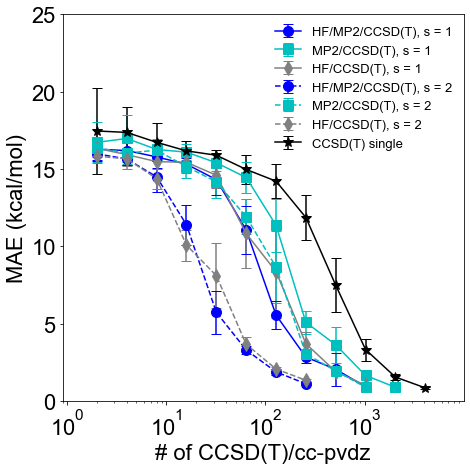

In [5]:
plt.rcParams['figure.figsize'] = (7, 7)

plt.errorbar(res['size'], res['HF+MP2+CCSD(T), s = 1'], res_std['HF+MP2+CCSD(T), s = 1'], capsize=5,
             marker='o', color='b', label='HF/MP2/CCSD(T), s = 1', markersize=10)

plt.errorbar(res['size'], res['MP2+CCSD(T), s = 1'], res_std['MP2+CCSD(T), s = 1'], capsize=5,
             marker='s', color='c', label='MP2/CCSD(T), s = 1', markersize=10)

plt.errorbar(res['size'], res['HF+CCSD(T), s = 1'], res_std['HF+CCSD(T), s = 1'], capsize=5,
             marker='d', color='grey', label='HF/CCSD(T), s = 1', markersize=10)

plt.errorbar(res['size'], res['HF+MP2+CCSD(T), s = 2'],  res_std['HF+MP2+CCSD(T), s = 2'], capsize=5,
             marker='o', ls='--', color='b', label='HF/MP2/CCSD(T), s = 2', markersize=10)


plt.errorbar(res['size'], res['MP2+CCSD(T), s = 2'], res_std['MP2+CCSD(T), s = 2'], capsize=5,
             marker='s', ls='--', color='c', label='MP2/CCSD(T), s = 2', markersize=10)

plt.errorbar(res['size'], res['HF+CCSD(T), s = 2'], res_std['HF+CCSD(T), s = 2'], capsize=5,
             marker='d', ls='--', color='grey', label='HF/CCSD(T), s = 2', markersize=10)

plt.errorbar(res['size'], res['CCSD(T), s = 1'], res_std['CCSD(T), s = 1'], capsize=5,
             
             marker='*', color='k', label='CCSD(T) single', markersize=10)
plt.xlabel('# of CCSD(T)/cc-pvdz')
plt.ylabel("MAE (kcal/mol)")
plt.xscale('log')
#plt.yscale('log')
plt.ylim([0, 25])
plt.xlim([0.9, 10000])
plt.xticks([1, 10, 100, 1000])
plt.legend(fontsize=13, frameon=False)
plt.tight_layout()
# plt.savefig('ccsdt_2.pdf')
# eb1[-1][0].set_linestyle('--')